In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from   matplotlib        import colormaps

D = 784
L = 12
M = 100
a = np.random.uniform(-1, 1, D)
b = np.random.uniform(-1, 1, L)
x = np.random.randint(0, 2, (M, D))
w = np.random.uniform(-1, 1, (D, L))

class LOGlike(object):
    """
    FORMAT:
    D = 784      # visible
    L = 12       # hidden
    M = len(x)   # number of data points
    a = np.random.uniform(-1, 1, D)
    b = np.random.uniform(-1, 1, L)
    x = np.random.randint(0, 2, (M, D))
    z = np.random.randint(0, 2, L)
    w = np.random.uniform(-1, 1, (D, L))
    """

    def __init__(self, x, L, spins=False):
        self.a = None # a   # visible
        self.b = None # b   # hidden
        self.D = None # a.shape[0]
        self.L = None # b.shape[0]
        self.x = x
        self.spins = spins
        self.M = len(x)
        self.w = None # w
        self.q = None
        self.k = None
        self.esit = []
        self.esit_ix = []
        self.z = None
        #
    #####
    #
    def initialization(self, a, b, w):
        self.a = a   # visible
        self.b = b   # hidden
        self.D = a.shape[0]
        self.L = b.shape[0]
        self.w = w
        self.make_z_states()
        self.H_and_G()
        #
    #####
    #
    def H_and_G(self):
        
        self.H_z_matrix = np.array([self.H(z) for z in self.z])  # Shape (2^L, D)
        self.G_z_vector = np.array([self.G(z) for z in self.z])  # Shape (2^L,)
        self.k          = np.mean(self.H_z_matrix @ self.x.T)
        #
    #####
    #
    def make_z_states(self):
        """
        2^L config
        """
        
        def get_bin(i, L):
            b = bin(i)[2:]
            return ("0" * (L - len(b))) + b
            #
        #####
        #
        self.z = np.array([[int(bit) for bit in get_bin(i, self.L)]
                                       for i in range(2 ** self.L)])
        if self.spins:
            self.z[self.z == 0] = -1
            #
        #####
        #
    #####
    #
    def H(self, z):
        """
        H(z) = a + w @ z
        """
        
        return self.a + np.dot(self.w, z)
        #
    #####
    #
    def G(self, z):
        """
        G(z) = exp(b @ z).
        """
        
        return np.exp(np.dot(self.b, z))
        #
    #####
    #
    def get_numerator(self, x):
        """
        ln{sum_z[G(z) * exp[dot(H_i(z) * x_i)]]}
        """
        
        exp_H_x   = np.exp(self.H_z_matrix @ x - self.k)  # Shape (2^L,)
        numerator = np.sum(self.G_z_vector * exp_H_x)
        
        return self.k + np.log(numerator)
        #
    #####
    #
    def get_denominator(self):
        """
        ln(Z) = D * ln(q) + ln{sum_z[G(z) * prod_i[(1 + H_i(z)) / q]]}
        """

        # q average over 1+exp(H_i(z))
        self.q = 1 + np.exp(np.mean(self.H_z_matrix))

        # sum_Z
        prod_H_q = np.prod((1 + np.exp(self.H_z_matrix)) / self.q, axis = 1)  # Shape (2^L,)
        Z_value  = np.sum(self.G_z_vector * prod_H_q)

        return self.D * np.log(self.q) + np.log(Z_value)
        #
    #####
    #
    def get_denominator_spin(self):
        """
        ln(Z) = D * ln(q) + ln{sum_z[G(z) * prod_i[cosh(H_i(z)) / q]]}
        """

        # q average over cosh(H_i(z))
        self.q = np.cosh(np.mean(self.H_z_matrix))

        # sum_Z
        prod_H_q = np.prod(np.cosh(self.H_z_matrix) / self.q, axis = 1)  # Shape (2^L,)
        Z_value  = np.sum(self.G_z_vector * prod_H_q)

        return self.D * np.log(self.q) + np.log(Z_value)    
        #
    #####
    #
    def run(self):
        """
        l_θ(x) = ln{sum_z[G(z) * exp(H_i(z) * x_i)]} - ln{Z}
        """
        if (self.spins == False):
            lnZ = self.get_denominator()
        else:
            lnZ = self.get_denominator_spin()
            #
        #####
        #
        log_likelihoods = np.array([self.get_numerator(x) - lnZ for x in self.x])
        self.esit.append(np.mean(log_likelihoods))
        #
    #####
    #
    def save(self):
        print(self.esit)
        '''file = open("L/" + str(self.L) + ".txt", "tw")
        file.write(str(self.esit))
        file.close()'''
        #
    #####
    #
#####
#
#
#Exe
log_likehood = LOGlike(x, L)
log_likehood.initialization(a, b, w)
log_likehood.run()
print("Log-likelihood media sul dataset:", log_likehood.save())

[-813.535908050806]
Log-likelihood media sul dataset: None


In [2]:
def read_all_log_like_bern():
    L3  = eval(open("L/3.txt").read())[1:]
    L4  = eval(open("L/4.txt").read())[1:]
    L5  = eval(open("L/5.txt").read())[1:]
    L6  = eval(open("L/6.txt").read())[1:]
    L7  = eval(open("L/7.txt").read())[1:]
    L8  = eval(open("L/8.txt").read())[1:]
    L9  = eval(open("L/9.txt").read())[1:]
    L10 = eval(open("L/10.txt").read())[1:]
    L11 = eval(open("L/11.txt").read())[1:]
    L12 = eval(open("L/12.txt").read())[1:]
    L13 = eval(open("L/13.txt").read())[1:]
    return [L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13]
    #
#####

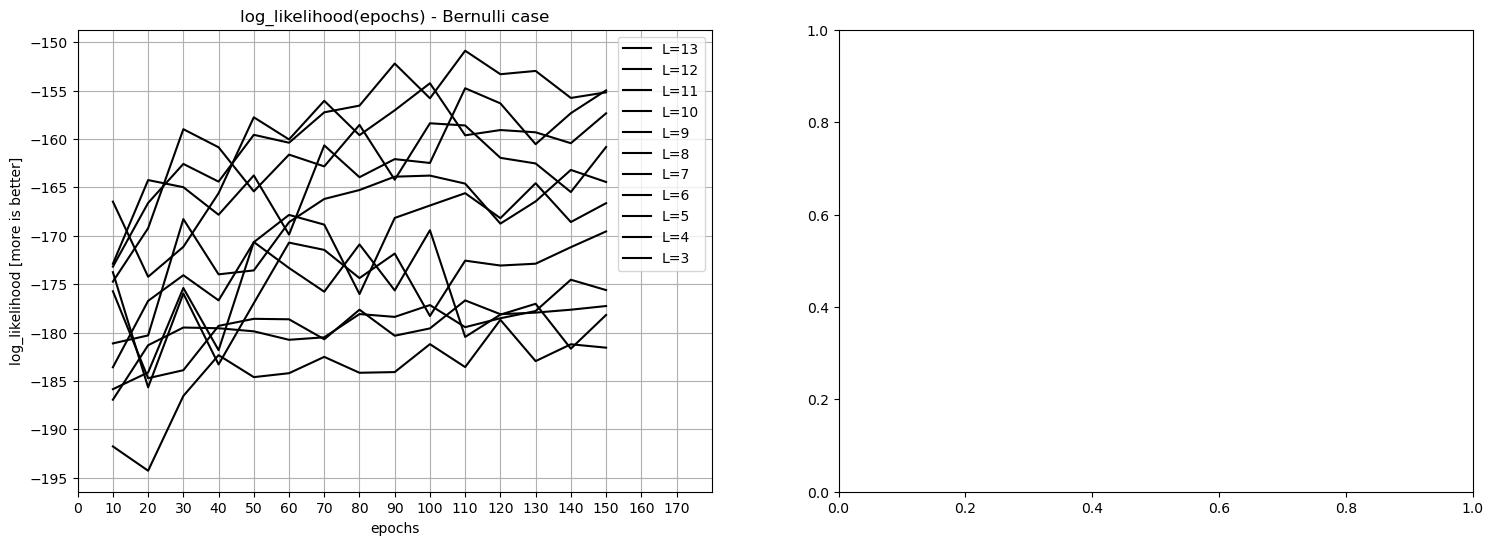

In [11]:
def plot_all_log_like(y):
    colormap = colormaps['Blues']
    fig, axs = plt.subplots(1, 2, figsize = (18, 6))
    #
    x = [i * 10 for i in range(1, 16)]
    for i in list(range(len(y)))[::-1]:
        color = colormap((i + 0.5) / (2 * len(y) - 2))
        axs[0].plot(x, y[i], label = "L=" + str(i + 3), color = (0,0,0,1))
        #
    #####
    #
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title('log_likelihood(epochs) - Bernulli case')
    axs[0].set_xlabel("epochs")
    axs[0].set_ylabel("log_likelihood [more is better]")
    axs[0].set_xlim(0, 180)
    axs[0].set_xticks(range(0, 171, 10))
    axs[0].set_yticks([-i for i in range(150, 200, 5)])
    #
    plt.show()
    #
#####
#
plot_all_log_like(read_all_log_like_bern())